<a href="https://colab.research.google.com/github/karim-mammadov/CodeAlpha_Tasks/blob/main/Iris_Flower_Classification_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Iris Flower Classification – Project Overview**

The goal of this project is to classify Iris flower species: Setosa, Versicolor, and Virginica. The dataset contains measurements of flowers’ sepal and petal lengths and widths. In this project:



*   Input features: Sepal Length, Sepal Width, Petal Length, Petal Width
*   Target: Flower species
*   Model: A machine learning classifier using Scikit-learn
*   Evaluation: Model accuracy and performance will be assessed on test data
*   Learning focus: Basic concepts of classification and machine learning



In [ ]:
# Upload your Kaggle API key (kaggle.json)
from google.colab import files
files.upload()

In [3]:
# Setup Kaggle directory and permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Download the dataset from Kaggle
!kaggle datasets download -d saurabh00007/iriscsv

Dataset URL: https://www.kaggle.com/datasets/saurabh00007/iriscsv
License(s): CC0-1.0
  0% 0.00/1.28k [00:00<?, ?B/s]
100% 1.28k/1.28k [00:00<00:00, 5.31MB/s]


In [5]:
# Extract the downloaded zip file
import zipfile
with zipfile.ZipFile('/content/iriscsv.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/iris_dataset')

**Load the dataset and prepare data**

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [7]:
# Load CSV file
data = pd.read_csv('/content/iris_dataset/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# Features and target
X = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = data['Species']

In [9]:
# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

In [10]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [12]:
# Initialize and train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# Predictions
y_pred = clf.predict(X_test)

In [14]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [16]:
# Confusion matrix create
cm = confusion_matrix(y_test, y_pred)

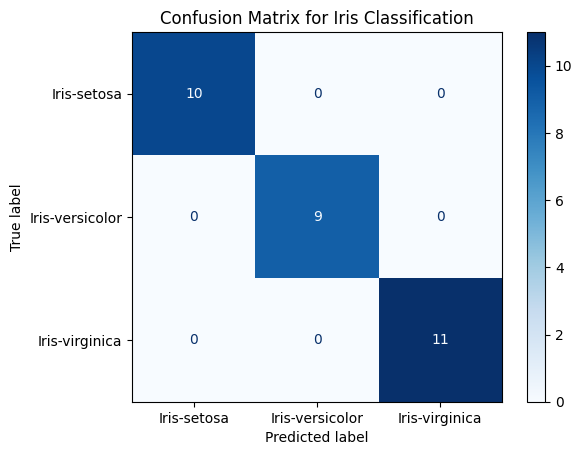

In [18]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Iris Classification")
plt.show()

In [19]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris

In [20]:
iris_data = load_iris()
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df['species'] = pd.Categorical.from_codes(iris_data.target, iris_data.target_names)

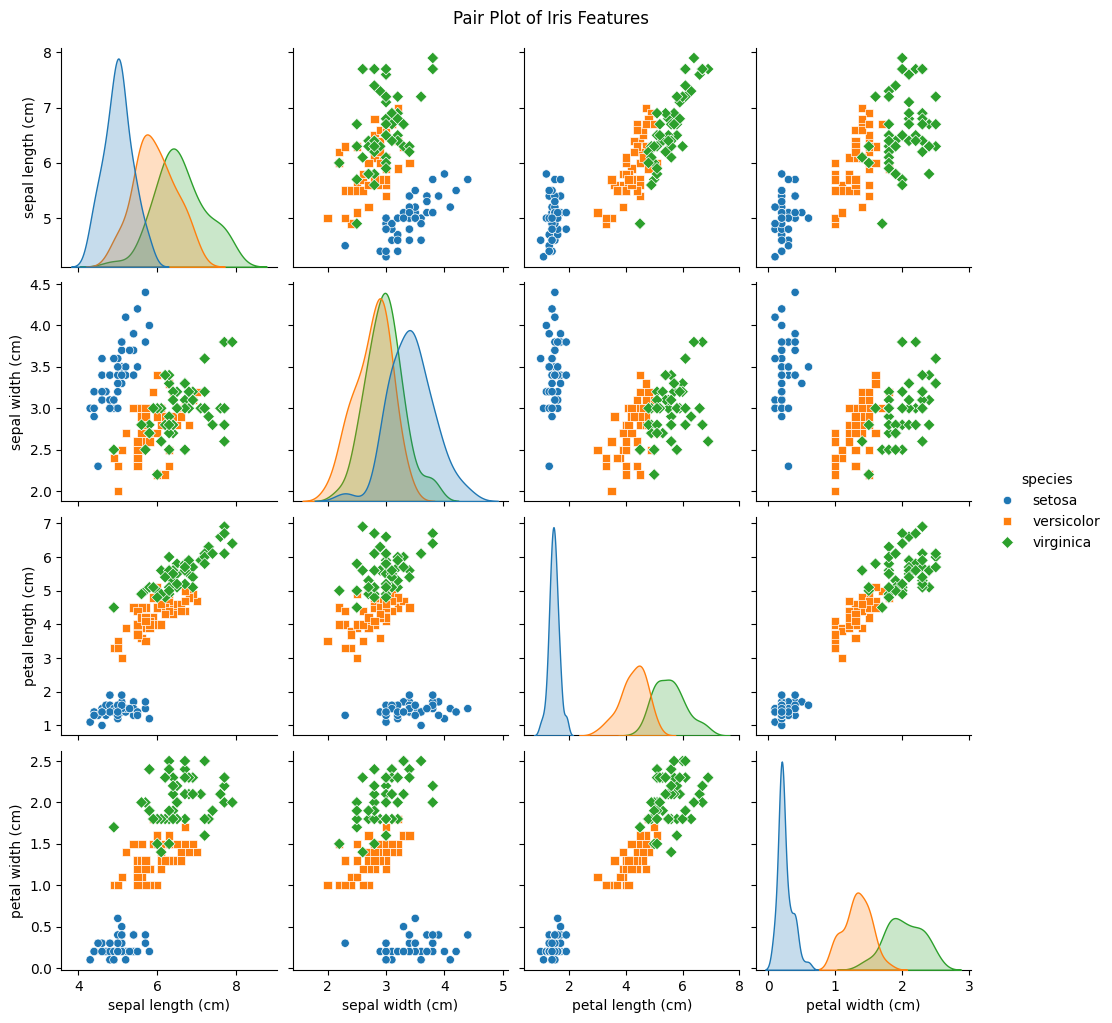

In [21]:
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.suptitle("Pair Plot of Iris Features", y=1.02)
plt.show()

In [22]:
import numpy as np

In [24]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

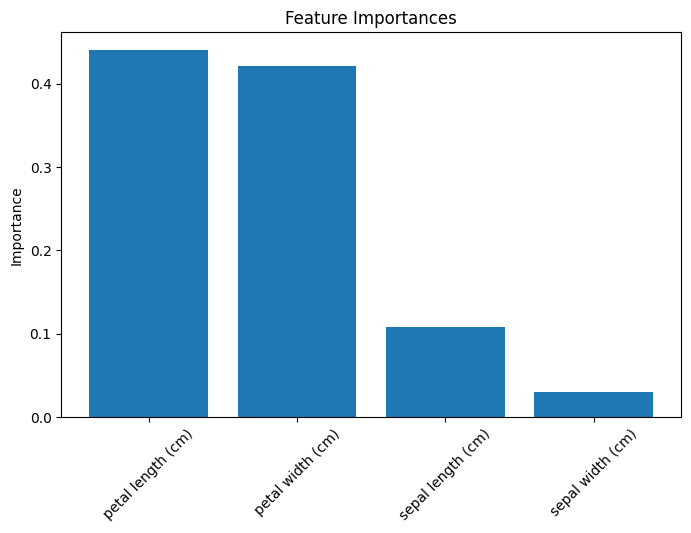

In [25]:
plt.figure(figsize=(8,5))
plt.title("Feature Importances")
plt.bar(range(df.shape[1]-1), importances[indices], align='center')
plt.xticks(range(df.shape[1]-1), [iris_data.feature_names[i] for i in indices], rotation=45)
plt.ylabel("Importance")
plt.show()